In [2]:
import numpy as np
import talib
import matplotlib.pyplot as plt
import mplfinance as mpf
from dataset import kline_data
from dateutil import parser

In [3]:
def ma_cross_signal(fast, slow):
    """MAs should be at the shape of price and non-existant indices must be NaN-padded."""
    n = fast.shape[0]
    buys = np.empty((n,))
    buys[:] = np.nan
    sells = np.empty((n,))
    sells[:] = np.nan
    d_fs = fast - slow
    for i in range(1, len(d_fs)):
        if not (np.isnan(d_fs[i]) or np.isnan(d_fs[i-1])):
            if d_fs[i] > 0 and d_fs[i-1] < 0:
                buys[i] = 1
            elif d_fs[i] < 0 and d_fs[i-1] > 0:
                sells[i] = 1
    return buys, sells

In [4]:
btc_4h = kline_data(interval='4h')
btc_4h = btc_4h.set_index(btc_4h['open_time'].map(parser.parse))
close = np.array(btc_4h['close'])
high = np.array(btc_4h['high'])
low = np.array(btc_4h['low'])

Last saved data candle close time: 2021-08-09 20:00:00


In [5]:
fast = talib.EMA(close, timeperiod=50)
slow = talib.EMA(close, timeperiod=200)

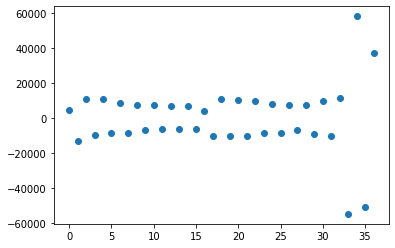

In [44]:
orders = np.nan_to_num(buys) - np.nan_to_num(sells)
orders = orders[orders != 0]
plt.scatter(np.arange(len(orders)), orders)

In [36]:
buys, sells = ma_cross_signal(fast, slow)
buys = buys * close
sells = sells * close

c:\users\aeali\pycharmprojects\crypto\btc\venv\lib\site-packages\mplfinance\_arg_validators.py:35: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


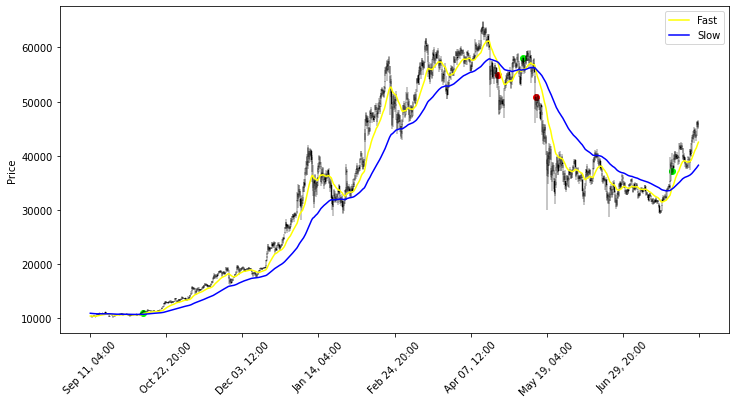

In [13]:
n_candles = 2000
fig = plt.figure(figsize=(12,6))
ax = plt.subplot()
ax.plot(fast[-n_candles:], label='Fast', color='yellow')
ax.plot(slow[-n_candles:], label='Slow', color='blue')
ax.scatter(np.arange(n_candles), buys[-n_candles:], color='lime')
ax.scatter(np.arange(n_candles), sells[-n_candles:], color='red')
ax.legend()
mpf.plot(btc_4h[-n_candles:], type='candle', volume=False, ax=ax)